In [121]:
# time series dataset of airline passenger travel from https://www.kaggle.com/andreazzini/international-airline-passengers

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from pylab import rcParams

# setting a default figure size for timeseries plots

rcParams['figure.figsize'] = 12,4

# inspecting the data

df = pd.read_csv('international-airline-passengers.csv')

df

# tidying up the data

df.drop(index = 144, inplace = True)
df.rename(columns = {'International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60': 
                     'passengers_thousands'}, inplace= True)
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace = True)
df = df.dropna()
df.head()

,passengers_thousands
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


Text(0, 0.5, 'Airline Passengers (1000s)')

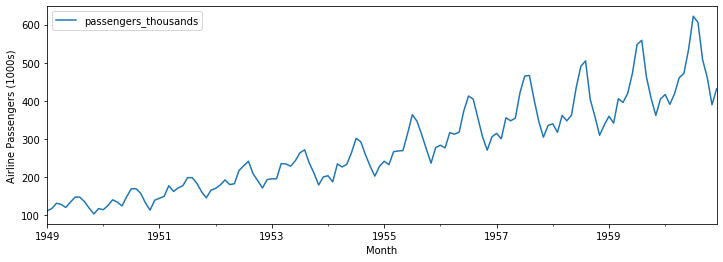

In [122]:
# plotting the timeseries

ax = df.plot(figsize = (12,4))
ax.set_ylabel('Airline Passengers (1000s)')

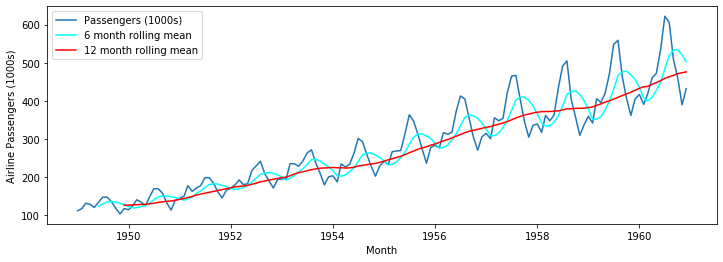

In [141]:
# plotting rolling means with 6 month and 12 month windows

y = df['passengers_thousands'].rolling(window = 6).mean()
y1 = df['passengers_thousands'].rolling(window = 12).mean()

plt.plot(df.index,df['passengers_thousands'], label = 'Passengers (1000s)')
plt.plot(df.index, y, label = '6 month rolling mean', color = 'cyan')
plt.plot(df.index,y1, label = '12 month rolling mean', color = 'red')
plt.xlabel('Month')
plt.ylabel('Airline Passengers (1000s)')
plt.legend()
plt.show()

Text(0, 0.5, 'Airline Passengers (1000s)')

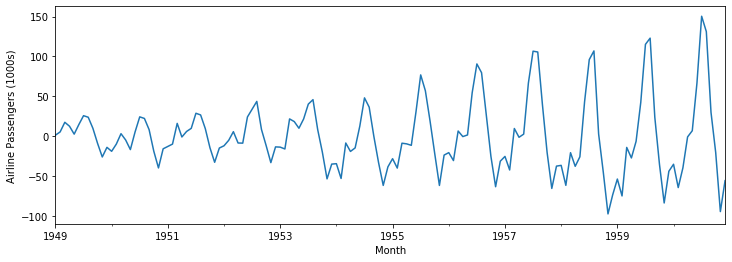

In [98]:
# using statsmodels Hodrick-Prescott filter to decompose the time series into cycle and trend components

hp = sm.tsa.filters.hpfilter

cycle, trend = hp(df, lamb = 129600)
df['cycle'] = cycle
df['trend'] = trend

ax1 = df['cycle'].plot(figsize = (12,4))
ax1.set_ylabel('Airline Passengers (1000s)')

Text(0, 0.5, 'Airline Passengers (1000s)')

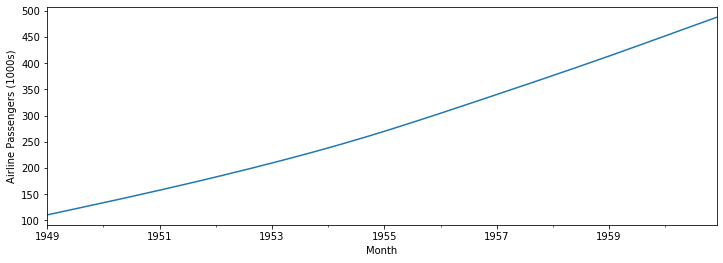

In [99]:
# plotting the trend 

ax2 = df['trend'].plot(figsize = (12,4))
ax2.set_ylabel('Airline Passengers (1000s)')

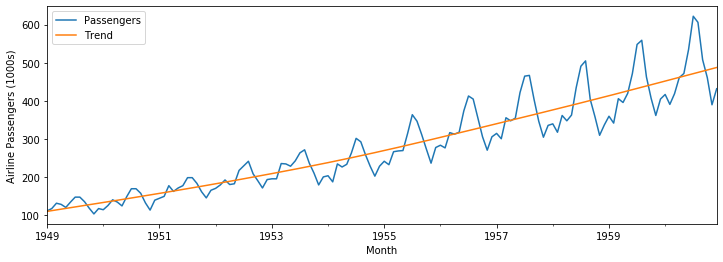

In [100]:
# plotting the trend against the original time series

ax3 = df['passengers_thousands'].plot(figsize = (12,4), label = 'Passengers')
df['trend'].plot(label = 'Trend')
ax3.set_ylabel('Airline Passengers (1000s)')
plt.legend()

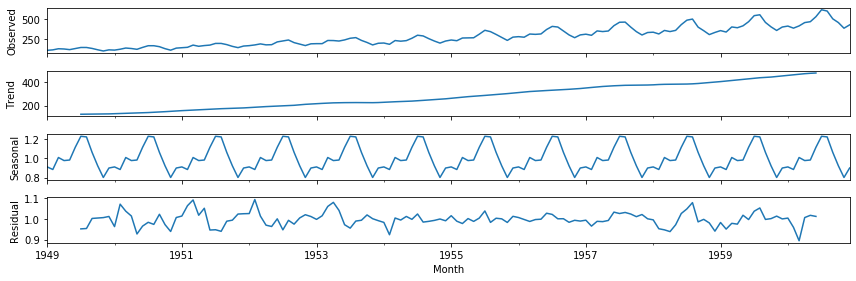

In [101]:
# using statsmodels seasonal decomposition to model the trend

seasonal = sm.tsa.seasonal_decompose

df2 =  seasonal(df['passengers_thousands'], model = 'multiplicative')

df2.plot();